## Import Libraries 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Load the data

In [93]:
pwd

'C:\\Users\\ranjiniprakash'

In [94]:
df = pd.read_csv("C:\\Users\\ranjiniprakash\\Downloads\\student_wellbeing_dataset.csv")
print(df)

     Student_ID  Attendance  Assignment_Timeliness  Test_Score Participation  \
0       STU0001        80.0                   63.6        54.8           Low   
1       STU0002        73.6                   63.2        60.4           Low   
2       STU0003        81.5                   43.1        56.0          High   
3       STU0004        90.2                   65.0        66.7        Medium   
4       STU0005        72.7                   81.0        83.0          High   
...         ...         ...                    ...         ...           ...   
4995    STU4996        74.5                   89.5        51.4           Low   
4996    STU4997        82.1                   40.0        83.6           NaN   
4997    STU4998       100.0                   59.4        84.7        Medium   
4998    STU4999        83.1                   77.4         NaN           Low   
4999    STU5000        66.5                   79.7        62.7           Low   

      Sleep_Hours  Screen_Time Exercise

In [95]:
df.head()

,Student_ID,Attendance,Assignment_Timeliness,Test_Score,Participation,Sleep_Hours,Screen_Time,Exercise,Extra_Curricular,LMS_Hours,Questions_Asked,Peer_Score,Stress,Mood,Risk_Level
0,STU0001,80.0,63.6,54.8,Low,6.0,3.5,Weekly,Yes,5.6,6.0,6.0,Low,Positive,Safe
1,STU0002,73.6,63.2,60.4,Low,4.9,3.5,Daily,No,2.7,5.0,2.0,Low,Positive,Safe
2,STU0003,81.5,43.1,56.0,High,4.2,4.2,NaN,Yes,6.4,2.0,9.0,Medium,Neutral,Moderate Risk
3,STU0004,90.2,65.0,66.7,Medium,5.1,3.0,Rarely,No,16.4,3.0,7.0,Low,Positive,Safe
4,STU0005,72.7,81.0,83.0,High,7.3,6.0,Rarely,No,7.6,4.0,6.0,Medium,Positive,Moderate Risk


## Data Exploration

Check shape, info, missing values:

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             4860 non-null   object 
 1   Attendance             4787 non-null   float64
 2   Assignment_Timeliness  4878 non-null   float64
 3   Test_Score             4766 non-null   float64
 4   Participation          4811 non-null   object 
 5   Sleep_Hours            4791 non-null   float64
 6   Screen_Time            4816 non-null   float64
 7   Exercise               3626 non-null   object 
 8   Extra_Curricular       4786 non-null   object 
 9   LMS_Hours              4842 non-null   float64
 10  Questions_Asked        4876 non-null   float64
 11  Peer_Score             4762 non-null   float64
 12  Stress                 4768 non-null   object 
 13  Mood                   4814 non-null   object 
 14  Risk_Level             5000 non-null   object 
dtypes: f

In [97]:
df.isnull().sum()

Student_ID                140
Attendance                213
Assignment_Timeliness     122
Test_Score                234
Participation             189
Sleep_Hours               209
Screen_Time               184
Exercise                 1374
Extra_Curricular          214
LMS_Hours                 158
Questions_Asked           124
Peer_Score                238
Stress                    232
Mood                      186
Risk_Level                  0
dtype: int64

In [98]:
df.describe()

,Attendance,Assignment_Timeliness,Test_Score,Sleep_Hours,Screen_Time,LMS_Hours,Questions_Asked,Peer_Score
count,4787.000000,4878.000000,4766.000000,4791.000000,4816.000000,4842.000000,4876.000000,4762.000000
mean,75.007520,69.760927,65.128976,6.483803,5.932911,8.065428,4.051066,5.543049
std,9.886325,14.760417,14.763336,1.178609,2.310136,3.856275,2.016968,2.866111
min,42.600000,30.000000,20.000000,3.000000,1.000000,0.000000,0.000000,1.000000
25%,68.400000,59.700000,55.200000,5.700000,4.300000,5.300000,3.000000,3.000000
50%,75.100000,69.800000,65.100000,6.500000,6.000000,8.100000,4.000000,6.000000
75%,81.600000,80.200000,75.000000,7.300000,7.600000,10.700000,5.000000,8.000000
max,100.000000,100.000000,100.000000,9.000000,10.000000,20.000000,14.000000,10.000000


## Check Class Distribution
Distribution of Risk_Level

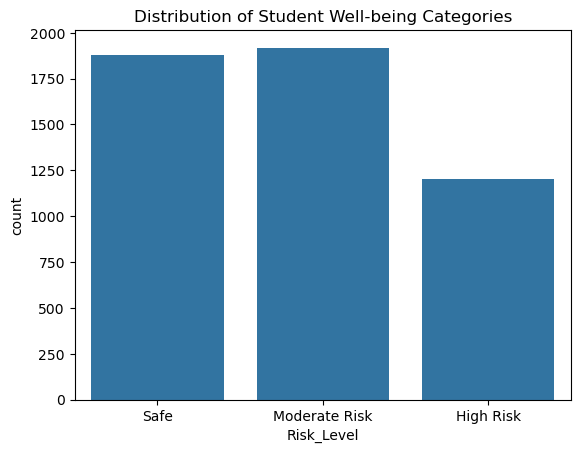

In [99]:
sns.countplot(x="Risk_Level", data=df)
plt.title("Distribution of Student Well-being Categories")
plt.show()

## Data Cleaning

Drop Student_ID (not useful for prediction).

Handling missing values:
Numerical → fill with median.
Categorical → fill with mode.

In [100]:
fill_values = {}

for col in df.columns:
    if df[col].dtype == "float64":  
        fill_values[col] = df[col].median()
    else: 
        fill_values[col] = df[col].mode()[0]

df.fillna(fill_values, inplace=True)


In [101]:
df.isnull().sum()


Student_ID               0
Attendance               0
Assignment_Timeliness    0
Test_Score               0
Participation            0
Sleep_Hours              0
Screen_Time              0
Exercise                 0
Extra_Curricular         0
LMS_Hours                0
Questions_Asked          0
Peer_Score               0
Stress                   0
Mood                     0
Risk_Level               0
dtype: int64

## Finding outliers
Select numeric columns only,
Dictionary to store number of outliers per column,
Detect outliers using IQR,
Condition for outliers,
Summary of outliers.

In [102]:
numeric_cols = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    outlier_counts[col] = outliers.shape[0]
    
print("\nNumber of outliers per column:")
print(outlier_counts)




Number of outliers per column:
{'Attendance': 36, 'Assignment_Timeliness': 22, 'Test_Score': 33, 'Sleep_Hours': 21, 'Screen_Time': 0, 'LMS_Hours': 21, 'Questions_Asked': 109, 'Peer_Score': 0}


## Feature Encoding
Converting categorical to numeric

In [103]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_enc.fit_transform(df[col])

In [104]:
print(df.dtypes)

Student_ID                 int32
Attendance               float64
Assignment_Timeliness    float64
Test_Score               float64
Participation              int32
Sleep_Hours              float64
Screen_Time              float64
Exercise                   int32
Extra_Curricular           int32
LMS_Hours                float64
Questions_Asked          float64
Peer_Score               float64
Stress                     int32
Mood                       int32
Risk_Level                 int32
dtype: object


##  Train-Test Split

In [105]:
X = df.drop(columns=["Risk_Level"])
y = df["Risk_Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [106]:
X_train.head()

,Student_ID,Attendance,Assignment_Timeliness,Test_Score,Participation,Sleep_Hours,Screen_Time,Exercise,Extra_Curricular,LMS_Hours,Questions_Asked,Peer_Score,Stress,Mood
3032,2951,79.5,91.2,67.5,1,5.6,10.0,1,0,9.0,1.0,2.0,2,2
78,75,75.9,75.0,70.4,1,6.3,6.6,1,0,3.4,3.0,10.0,1,2
806,786,77.2,35.4,56.4,2,6.9,1.0,1,0,11.8,5.0,1.0,2,2
4509,4380,74.3,82.4,47.5,1,5.0,6.9,1,0,14.3,3.0,1.0,0,2
3939,3824,67.3,67.7,68.7,1,6.8,8.0,1,0,12.4,8.0,2.0,2,2


In [107]:
y_train.head()

3032    1
78      2
806     1
4509    0
3939    1
Name: Risk_Level, dtype: int32

In [108]:
print("X_train shape:", X_train.shape)

X_train shape: (4000, 14)


In [109]:
print("X_test shape:", X_test.shape)

X_test shape: (1000, 14)


In [110]:
print("y_train shape:", y_train.shape)

y_train shape: (4000,)


In [111]:
print("y_test shape:", y_test.shape)

y_test shape: (1000,)


## Feature Scaling

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

Starting with Random Forest 

In [113]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#### Check predicted labels
first 10 predictions

In [114]:
print(y_pred[:10]) 

[2 2 2 1 1 2 2 1 2 0]


#### Compare with actual labels

In [115]:
print("Actual labels:", y_test[:10].values)
print("Predicted labels:", y_pred[:10])


Actual labels: [2 2 2 1 1 2 2 1 2 0]
Predicted labels: [2 2 2 1 1 2 2 1 2 0]


#### Evaluate the model

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.967
Confusion Matrix:
 [[226   5  10]
 [  0 366  18]
 [  0   0 375]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       241
           1       0.99      0.95      0.97       384
           2       0.93      1.00      0.96       375

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



## Evaluation

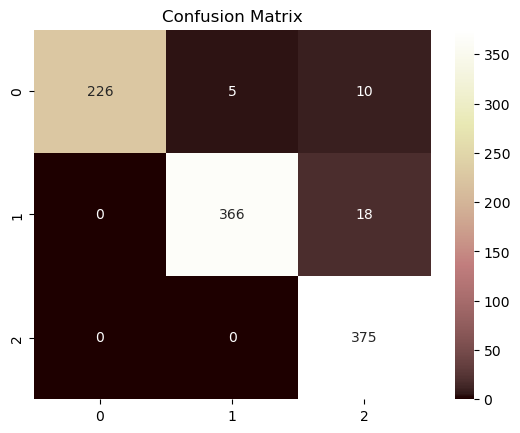

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="pink")
plt.title("Confusion Matrix")
plt.show()


## Feature Importance
Sort by importance

In [118]:

importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)


                  Feature  Importance
12                 Stress    0.741813
5             Sleep_Hours    0.036637
3              Test_Score    0.031979
1              Attendance    0.029944
6             Screen_Time    0.029068
0              Student_ID    0.026786
2   Assignment_Timeliness    0.026005
9               LMS_Hours    0.023590
11             Peer_Score    0.014376
10        Questions_Asked    0.014109
13                   Mood    0.009940
4           Participation    0.006267
7                Exercise    0.005972
8        Extra_Curricular    0.003514


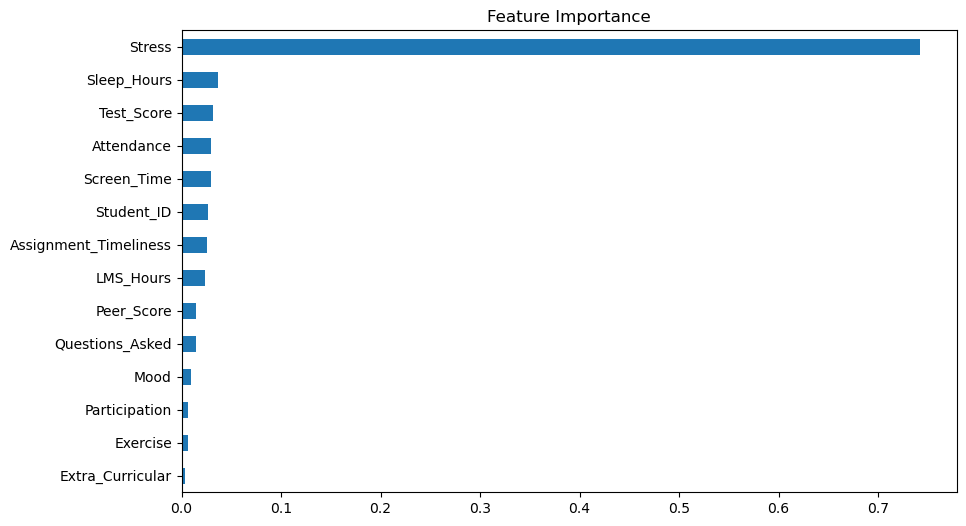

In [119]:
feat_imp = pd.Series(rf.feature_importances_, index=df.drop(columns=["Risk_Level"]).columns)
feat_imp.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Feature Importance")
plt.show()


### top 3 and least 2 features

In [120]:

top_features = feature_df.head(3)['Feature'].tolist()
least_features = feature_df.tail(2)['Feature'].tolist()
print("Top features:", top_features)
print("Least important features:", least_features)


Top features: ['Stress', 'Sleep_Hours', 'Test_Score']
Least important features: ['Exercise', 'Extra_Curricular']


## Policy insights
Map policy suggestions based on feature names,
Optional: keep only top features for recommendations.

In [121]:
feature_df['Policy_Insight'] = feature_df['Feature'].map(policy_mapping)
top_features_df = feature_df.head(5)  
print(top_features_df)

        Feature  Importance                            Policy_Insight
12       Stress    0.741813      Organize stress management workshops
5   Sleep_Hours    0.036637  Educate students on healthy sleep habits
3    Test_Score    0.031979            Provide extra academic support
1    Attendance    0.029944     Encourage regular attendance programs
6   Screen_Time    0.029068             Reduce excessive screen usage
